In [1]:
# packages 

import math
import random
import numpy as np
from operator import itemgetter
from sklearn import datasets
from matplotlib import pyplot as plt

In [2]:
def handleDataset(dataset, split, trainingSet=[], testSet=[]):
    for x in range(len(dataset)-1):
        for y in range(4):
            dataset[x][y] = float(dataset[x][y])
        if random.random() < split:
            trainingSet.append(dataset[x])
        else:
            testSet.append(dataset[x])

In [3]:
iris = datasets.load_iris()
trainingSet = []
testSet = []
X = iris.data
y = iris.target

dataSet = []
for i in range(len(X)):
    dataSet.append(np.append(X[i],float(y[i])))
    

dataSet = np.asarray(dataSet)

handleDataset(dataSet, 0.66, trainingSet, testSet)
print('Train: ' + repr(len(trainingSet)))
print('Test: ' + repr(len(testSet)))

Train: 100
Test: 49


In [4]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [5]:
def getKNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [6]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [7]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [8]:

testInstance = dataSet[len(dataSet)-1]
for x in range(4):
    testInstance[x] = float(testInstance[x])

neighbors = getKNeighbors(trainingSet, testInstance, 10)
response = getResponse(neighbors)

print("The choosen test label:")
print(testInstance[4])

print("Prediction:")
print(response)


The choosen test label:
2.0
Prediction:
2.0


In [9]:
def main(k): 
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.67
    handleDataset(dataSet, split, trainingSet, testSet)
    
    # generate predictions
    
    predictions=[]
    for x in range(len(testSet)):
        neighbors = getKNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
        
     
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
    

In [10]:
# K = 10
main(10)

> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=1.0
> predicted=2.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, act

In [11]:
# K = 10 + 7
main(17)

> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, act

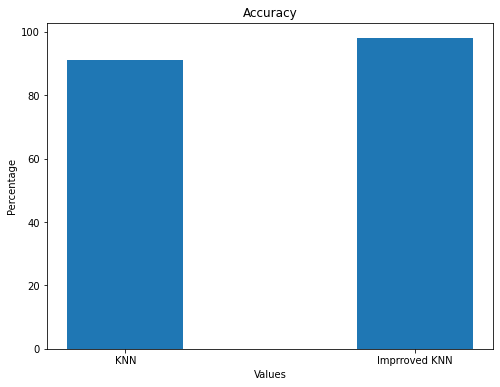

In [12]:
KNN = 91
NKNN = 98

data = {'KNN':KNN, 'Imprroved KNN':NKNN}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(8, 6))

plt.bar(courses, values,
        width = 0.4)
plt.xlabel('Values')
plt.ylabel('Percentage')
plt.title('Accuracy')
plt.show()